### SN3

## Minuit section

### EI

In [22]:
import sys
print("Using Python {}".format(sys.version_info[0]))

from pylab import *
import numpy as np

from matplotlib import rc
rc('figure',figsize=(10,5))
rc('font',size=12)
rc('text',usetex=False)
!pip install emcee
!pip install iminuit
import cosmolib as cs

Using Python 3


###  Read Data - EI

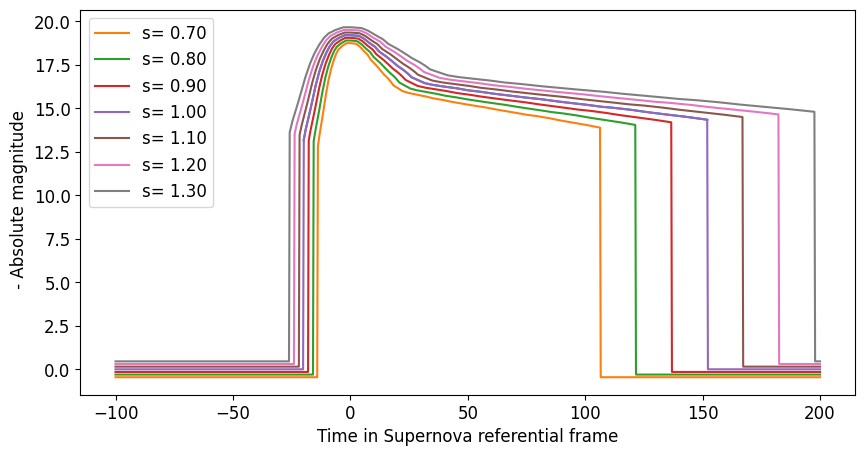

In [ ]:
t, mag = np.loadtxt('Data-LightCurves/Data-LightCurves/EI2019-Data-LightCurves-SN-SNI-Average_LightCurve.txt').T
plot(t,-mag)
xlabel('Time in Supernova referential frame')
ylabel(' - Absolute magnitude')

class SNIaLightCurve:
    def __init__(self, data):
        self.data = data
        self.t0 = 0.
    def __call__(self,t,s):
      return np.interp(t, self.data[:,0]*s, self.data[:,1], left=0,right=0)- 1.52*(s-1)

lc = SNIaLightCurve(np.array([t,mag]).T)

svals = np.linspace(0.7, 1.3, 7)

ttt = np.linspace(-100, 200, 1000)
for i in range(len(svals)):
  plot(ttt, -lc(ttt,svals[i]), label='s={0:5.2f}'.format(svals[i]))
xlabel('Time in Supernova referential frame')
ylabel(' - Absolute magnitude')
legend()

### TD2

In [ ]:
# def line_to_fit(x, pars):
##  values = pars[0] + pars[1]*x
##  return values

In [ ]:
# guess = np.array([0., 0.])
# result = cs.do_minuit(x,y,sigma_y,guess,functname=line_to_fit)

#for i in range(len(result[1])):
#  print('Parameter {0:d} = {1:5.2f} +/- {2:5.2f}'.format(i, result[1][i], result[2][i]))

#errorbar(x,y,yerr=sigma_y,fmt='ro', label='Sample Data')
#plot(x, line_to_fit(x, result[1]),'k', label='Fitted with Minuit')
#xlim(-0.1,1.1)
#xlabel('x')
#ylabel('y')
#legend(loc='upper left')

#def newmusn(x, pars):
#    cosmo = {'h':pars[0], 'omega_M_0':pars[1],
#             'omega_lambda_0':pars[2], 'w0':pars[3]}
#    val = cs.musn1a(x, cosmo)
#    val[isnan(val)] = -1e30
#    return val

### Use of minuit on our data

pars : array with the cosmological parameters

input : 
- Graph X x Y
- Variance of Y
- guess
- functname (here line_to_fit)

output : (Fitting with Minuit)
- chi2
- ndf
- Fitted values
- errors
- Covariance

In [ ]:
def line_to_fit(x, pars):
    values = pars[0] + pars[1]*x
    return values

guess = np.array([0., 0.])
result = cs.do_minuit(x,y,sigma_y,guess,functname=line_to_fit)

